Set 2 Problem 1

Standard imports

To examine the impact of max_features and of bootstraping and the choise of algorithm the average correlation calculated for each classifier with and without bootstraping is plotted as a function of number of max_features. However, due to the construction of BaggingClassifier which uses always all features it is not possible to examine to examine impact of max_features. Therefore, the BaggingClassifier is plotted just for comparison with other classifiers and does not take into account the number of max_features. The question of picking the best split point is associated with the internal construction of each classifiers, namely RandomForestClassifier uses always the best split and BaggingClassifier does not use the best split. Therefore, the comparison between using and not using best spliting is reduced to direct comparison between classifiers.

In [9]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

def GetAveragCorrelation(classifier, mxf, bts):
    if classifier==0:
        rgr = RandomForestClassifier(n_estimators=10,bootstrap=bts, max_features=mxf,random_state=1)
    if classifier==1:
        rgr = BaggingClassifier(n_estimators=10,  bootstrap=bts, random_state=1)
    if classifier==2:
        rgr = ExtraTreesClassifier(n_estimators=10,  bootstrap=bts,max_features=mxf, random_state=1)
                 
    rgr.fit(X_train, y_train)

    corr = np.zeros((10, 10))
    AverageCorrelation = 0
    for i in range(10):
        for j in range(10):
            rgr1 = rgr.estimators_[i]
            rgr2 = rgr.estimators_[j]
            corr[i,j] = np.corrcoef(rgr1.predict_proba(X_test)[:,0], rgr2.predict_proba(X_test)[:,0])[0, 1]
            AverageCorrelation+=corr[i,j]
    #plt.imshow(corr, interpolation='none')
    AverageCorrelation/=100
    return AverageCorrelation

def GetAveragCorrelationMXF(max_features,classifier, bts):
    performaceMXF = []
    
    for i in max_features:
        performaceMXF.append(GetAveragCorrelation(classifier,i, bts))  
    return performaceMXF
    
    
def ComparePerformanceOfClassifiersAndBootStraping(max_features):
    performaces = []
    for bootstraping in range (0,2):
        for classifier in range (0,3):
            performaces.append( GetAveragCorrelationMXF(max_features,classifier, bootstraping)  )
       
    
    return performaces    

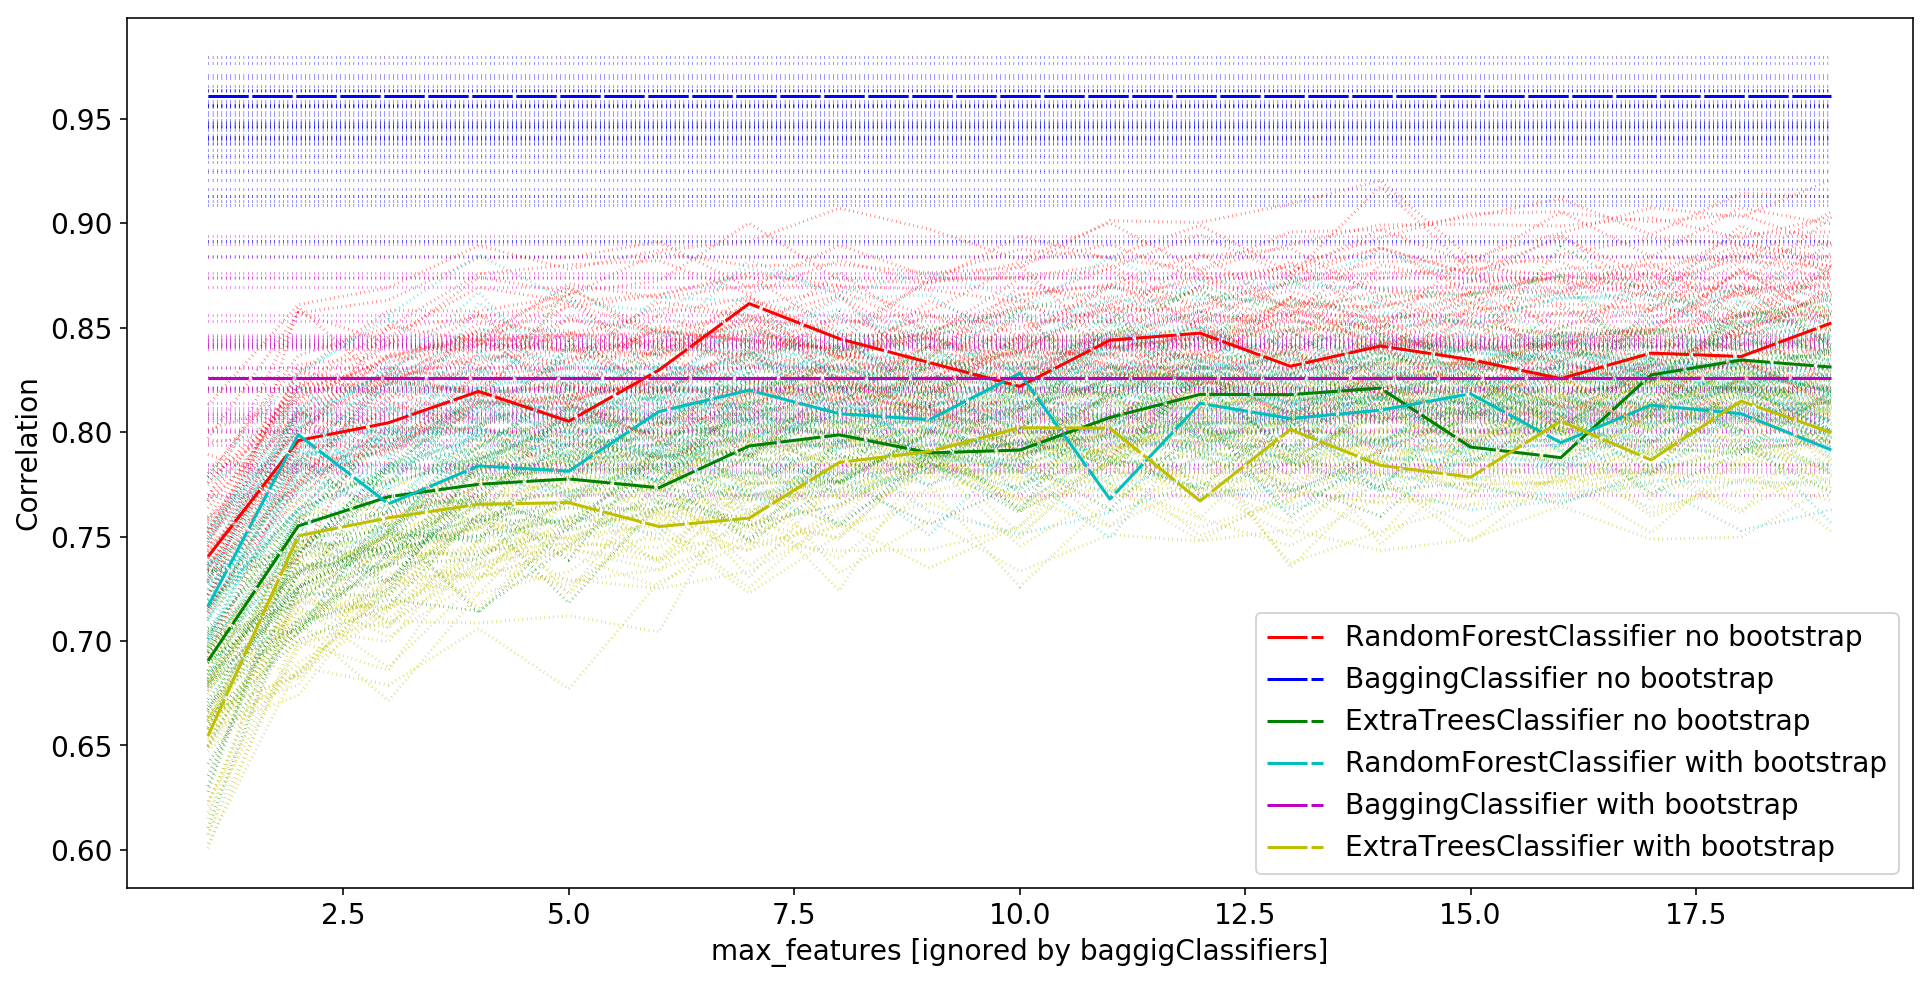

In [11]:

max_features = range (1,20)
AveragePerformances= []
for j in range (0,50):
    
    X, y = load_breast_cancer(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=j)
    Performances = ComparePerformanceOfClassifiersAndBootStraping(max_features)
    AveragePerformances+= Performances
    plt.plot(max_features, Performances[0], 'r--', dashes=(0.1,1)) 
    plt.plot(max_features, Performances[1], 'b--', dashes=(0.1,1))
    plt.plot(max_features, Performances[2], 'g--', dashes=(0.1,1))
    plt.plot(max_features, Performances[3], 'c--', dashes=(0.1,1)) 
    plt.plot(max_features, Performances[4], 'm--', dashes=(0.1,1))
    plt.plot(max_features, Performances[5], 'y--', dashes=(0.1,1))
    
    
plt.plot(max_features, AveragePerformances[0], 'r--', dashes=(10,1),  label="RandomForestClassifier no bootstrap") 
plt.plot(max_features, AveragePerformances[1], 'b--', dashes=(10,1),  label="BaggingClassifier no bootstrap")
plt.plot(max_features, AveragePerformances[2], 'g--', dashes=(10,1),  label="ExtraTreesClassifier no bootstrap")
plt.plot(max_features, AveragePerformances[3], 'c--', dashes=(10,1),  label="RandomForestClassifier with bootstrap") 
plt.plot(max_features, AveragePerformances[4], 'm--', dashes=(10,1),  label="BaggingClassifier with bootstrap")
plt.plot(max_features, AveragePerformances[5], 'y--', dashes=(10,1),  label="ExtraTreesClassifier with bootstrap") 

plt.legend(loc='best')
plt.xlabel("max_features [ignored by baggigClassifiers]")
plt.ylabel("Correlation")




The figure above suggests generally bootstraping reduces the amount of correlation in case of all classifiers. We also see that increasing number of max featuers is increasing the correlation for RandomForest aand for ExtraTrees in case of no bootstraping but with bootstraping the level of correlation is less sensitive the changes of max_features. We also observe that Bagging algortim shows the highest correlation both with and without bootstraping. Therefore, the data indicate that using optimal spliting implemented in RandomForest is leading to less correlation.